## Import all the required library

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from matplotlib.pyplot import figure
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore'

##  Loading Dataset

In [11]:
df = pd.read_csv('TSLA.csv')

In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [14]:
data_to_use = tesla['Close'].values

In [6]:
print('Total number of days in the dataset:{}'.format(len(data_to_use)))

Total number of days in the dataset:2416


In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [22]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
print("Total number of numerical(int) columns are ", len(int64_lst))
print(" Names: ", int64_lst)

Total number of numerical(int) columns are  1
 Names:  ['Volume']


In [23]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)
print("Total number of numerical(float) columns are ", len(float64_lst))
print(" Names : ", float64_lst)

Total number of numerical(float) columns are  5
 Names :  ['Open', 'High', 'Low', 'Close', 'Adj Close']


In [26]:
len(df['Date'].unique()), df.shape[0]

(2416, 2416)

In [27]:
df = df.drop(['Date','Adj Close'],axis=1)

In [28]:
#count rows and columns.
print ('The new TSLA dataset has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The new TSLA dataset has 2416 rows and 5 columns


## Data Exploration

<AxesSubplot: >

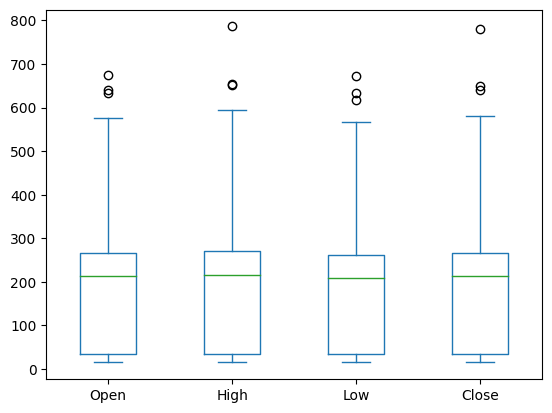

In [30]:
df[['Open','High','Low','Close']].plot(kind='box')

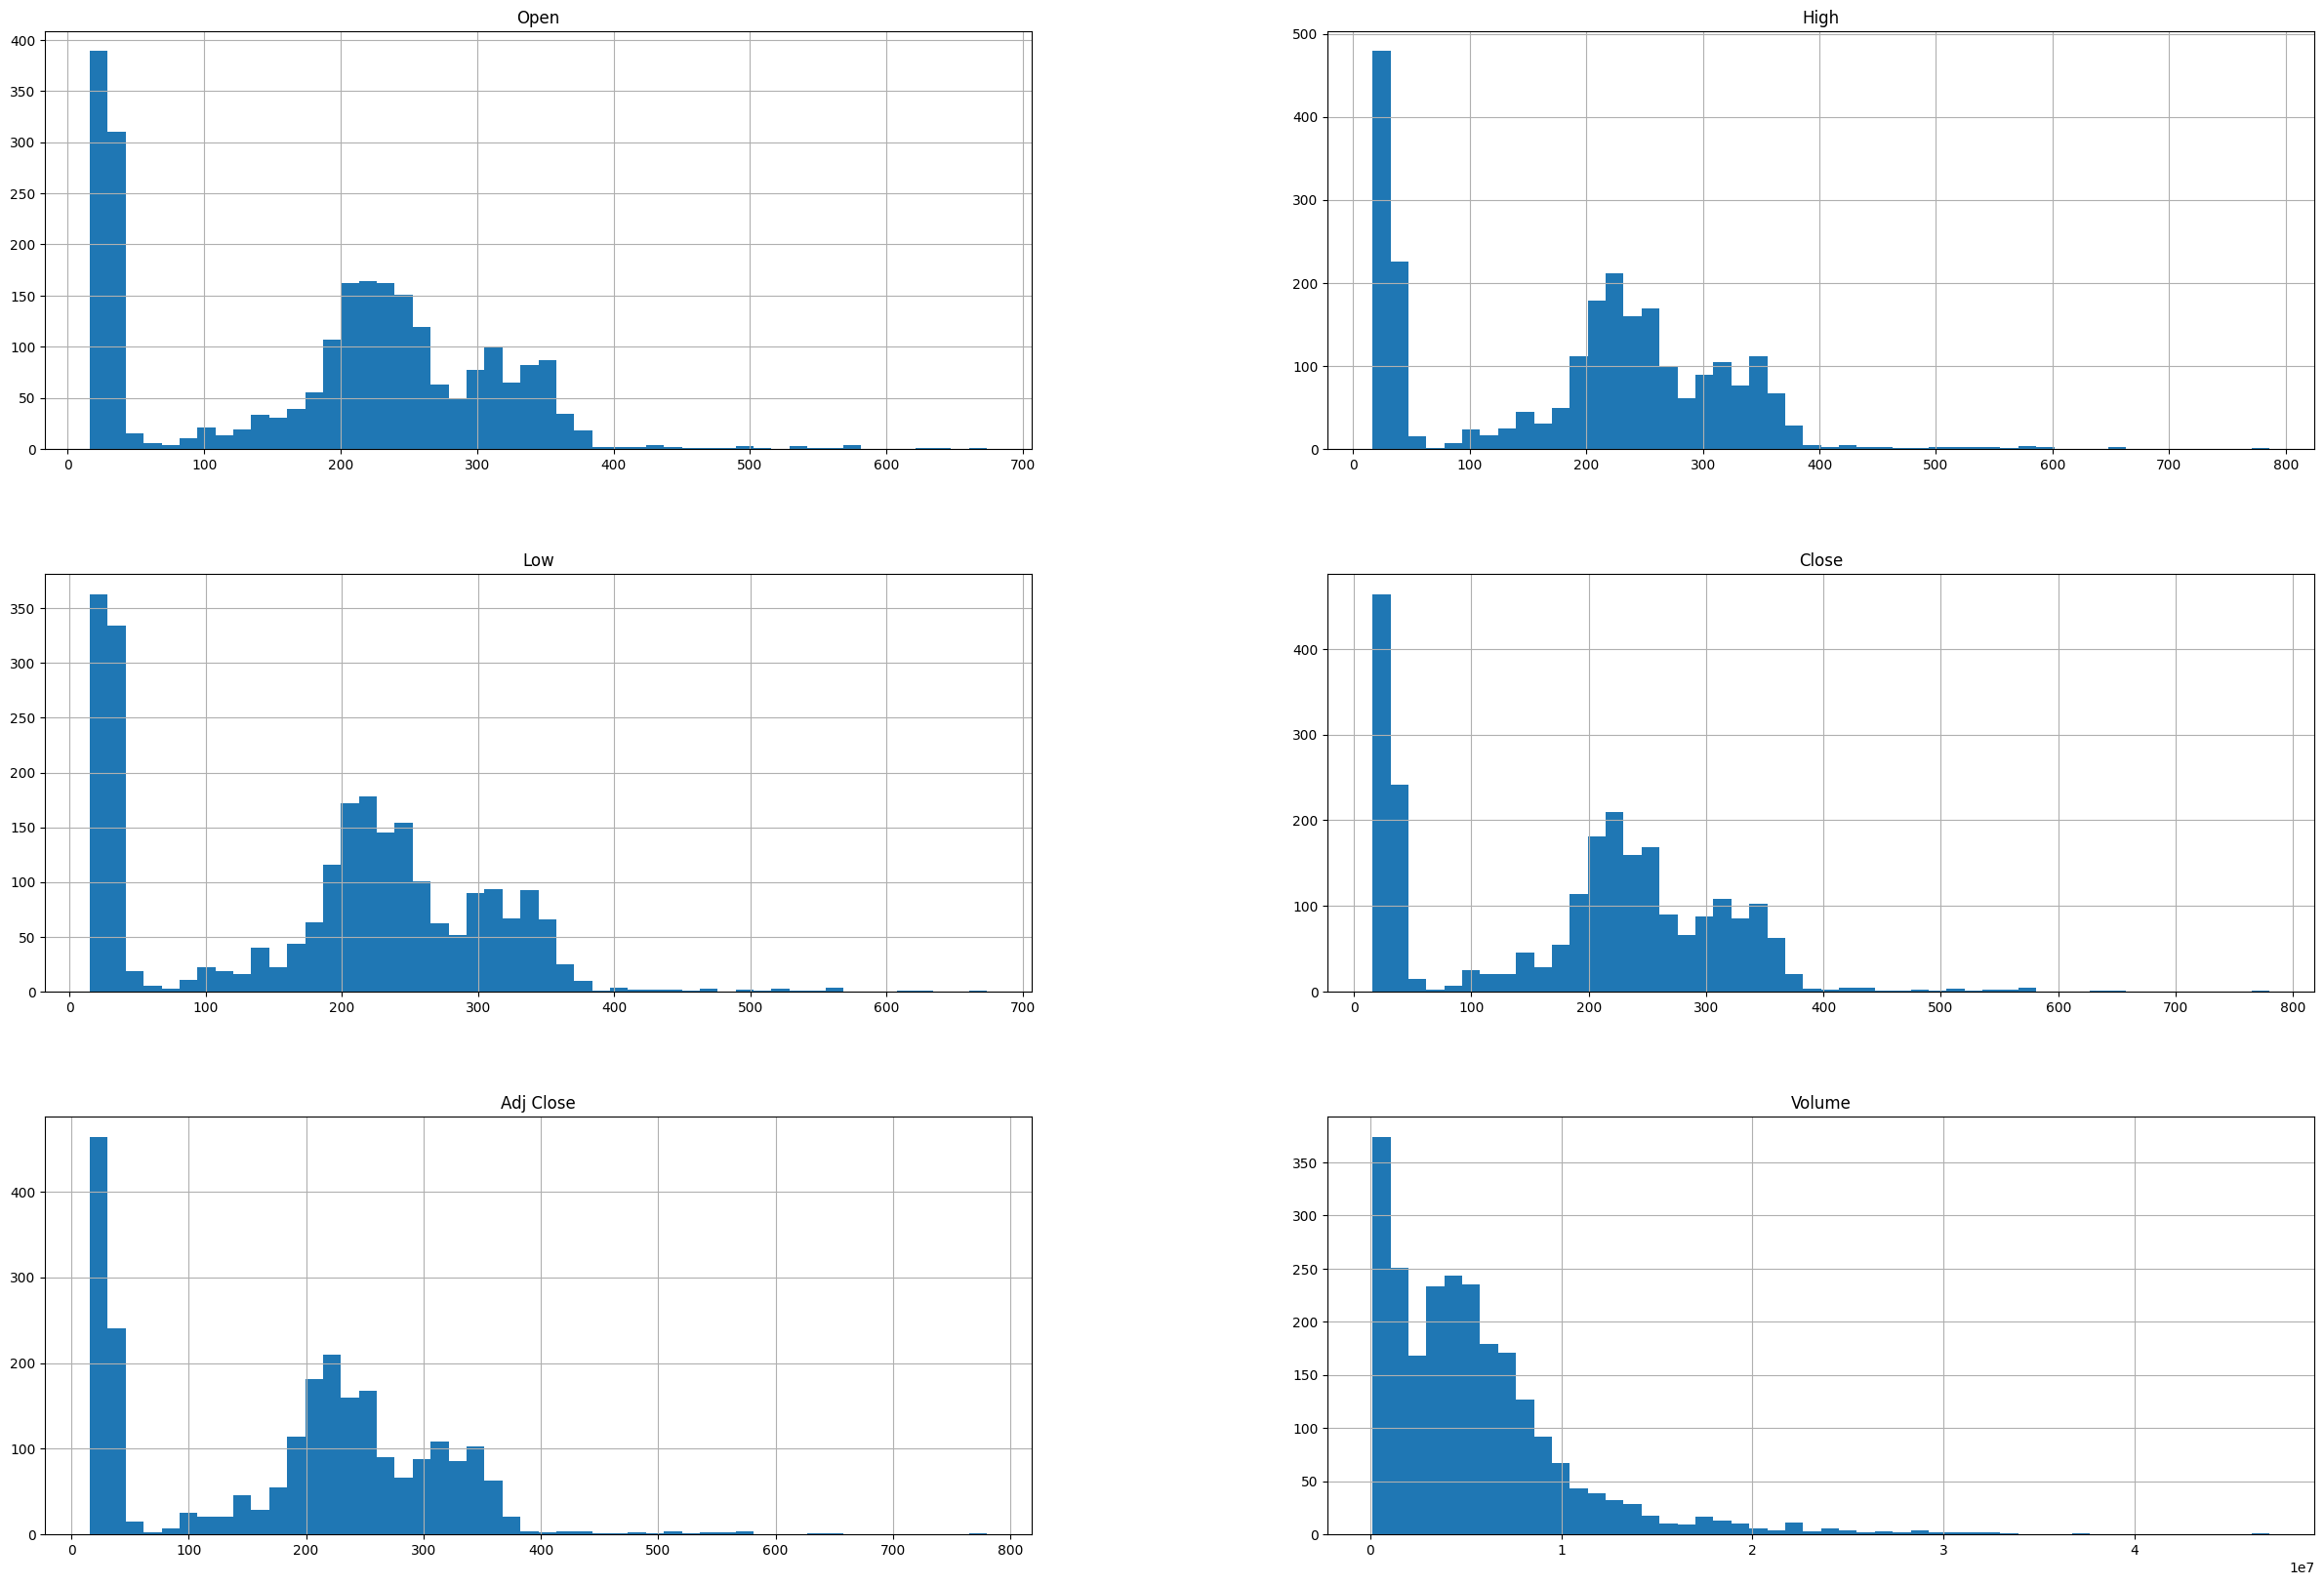

In [17]:
# Histogram
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,20))
plt.show()

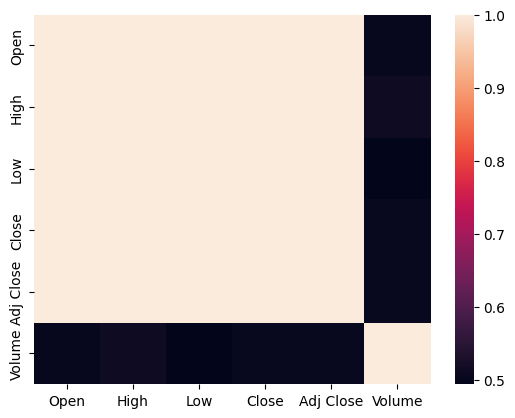

In [18]:
# Heatmap
corr = df.corr().abs()
sns.heatmap(corr)
plt.show()

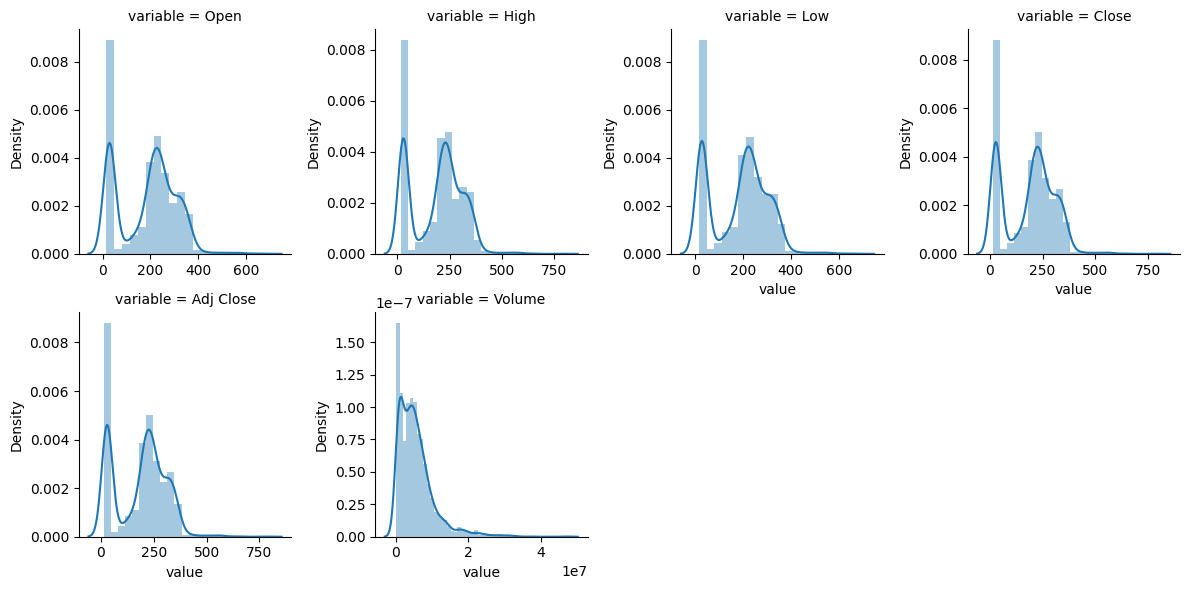

In [19]:
# Distplot
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [31]:
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Adj Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000


## Descriptive Analysis

In [33]:
df.var()

Open      1.409923e+04
High      1.461496e+04
Low       1.365570e+04
Close     1.419339e+04
Volume    2.487824e+13
dtype: float64

In [34]:
zero_cols = []

def var_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

In [35]:
var_cal(df, int64_lst)

,normal_value,zero_value
0,1,0


In [36]:
df.median()

Open      2.130350e+02
High      2.167450e+02
Low       2.088700e+02
Close     2.129600e+02
Volume    4.578400e+06
dtype: float64

In [37]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df



In [38]:
median_cal(df, int64_lst)

,normal_value,zero_value
0,1,0


In [39]:
# Mode
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in int64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [40]:
mode_cal(df, int64_lst)

,normal_value,zero_value,string_value
0,1,0,0


In [41]:
# Mean
df.mean()

Open      1.862711e+02
High      1.895782e+02
Low       1.829166e+02
Close     1.864037e+02
Volume    5.572722e+06
dtype: float64

In [42]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df
mean_cal(df, int64_lst)

,normal_value,zero_value
0,1,0


In [43]:
# Null Values
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [45]:
# Nan values
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [46]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [47]:
int64_cols = ['int64']
int64_lst_col = list(df.select_dtypes(include=int64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, int64_lst_col)

In [48]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,Volume,2.1652,positive (+ve) skewed


In [50]:
def right_nor_left(df, float64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in float64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df
float64_cols = ['float64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,Open,-0.0144,negative (-ve) skewed
1,High,0.0119,positive (+ve) skewed
2,Low,-0.0104,negative (-ve) skewed
3,Close,0.0165,positive (+ve) skewed


In [51]:
#Standard Deviation
df.std()

Open      1.187402e+02
High      1.208923e+02
Low       1.168576e+02
Close     1.191360e+02
Volume    4.987809e+06
dtype: float64

In [52]:
df['Close'].std()

119.13601997634152

In [53]:
def std_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

In [54]:
std_cal(df, int64_lst)

,normal_value,zero_value
0,1,0


## Data pre-processing

In [62]:
encoder = OneHotEncoder()
for value in int64_lst:

    transformed = encoder.fit_transform(df[[value]])
    df[encoder.categories_[0]] = transformed.toarray()
int64_lst

['Volume']

In [63]:
df = df.drop(int64_lst, axis=1)

In [64]:
df.head()

,Open,High,Low,Close,118500,141000,161100,162800,171200,201100,...,30006100,30875800,31071700,31144300,31369000,32371900,32681700,33649700,37163900,47065000
0,19.000000,25.00,17.540001,23.889999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.790001,30.42,23.299999,23.830000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.000000,25.92,20.270000,21.959999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23.000000,23.10,18.709999,19.200001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.000000,20.00,15.830000,16.110001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
df.to_csv('TSLA_3.csv')

In [66]:
df.head()

,Open,High,Low,Close,118500,141000,161100,162800,171200,201100,...,30006100,30875800,31071700,31144300,31369000,32371900,32681700,33649700,37163900,47065000
0,19.000000,25.00,17.540001,23.889999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.790001,30.42,23.299999,23.830000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.000000,25.92,20.270000,21.959999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23.000000,23.10,18.709999,19.200001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.000000,20.00,15.830000,16.110001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
df.to_csv('TSLA_3.csv')

In [68]:
# Read preprocess csv file
df = pd.read_csv('Tesla_Stocke3.csv')

In [69]:
df = df.drop('Unnamed: 0',axis=1)

In [70]:
# View first 5 rows
df.head()

,Open,High,Low,Close,710277,1333518,1422335,1554979,1615961,1659059,...,14863266,14915249,15354717,15649607,15962015,16464952,17046701,17261435,19324495,23742414
0,318.94,327.12,311.22,325.89,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,323.00,324.45,316.13,319.57,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,335.50,341.49,321.04,323.47,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,336.89,339.60,332.51,335.07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,346.00,347.50,326.29,334.46,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Preparation

In [71]:
target = 'Close'
X = df.drop(target,axis=1)
y = df[target]

In [72]:
# Check the shape of X and y variable
X.shape, y.shape

((756, 759), (756,))

In [73]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [74]:
# Again check the shape of X and y variable
X.shape, y.shape

((756, 759), (756, 1))

In [75]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((604, 759), (152, 759), (604, 1), (152, 1))

In [77]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Model Training
------->>>>>>lasso regression

In [80]:
# define lasso regression model object
lasso_reg = LassoCV()


In [81]:
# train or fit train dataset on lasso regression model
lasso_reg = lasso_reg.fit(X_train, y_train)

In [82]:
# Get R2 score
lasso_reg.score(X_train, y_train)

0.9969121035577688

In [90]:
# get kfold values
lasso_scores = -1 * cross_val_score(lasso_reg, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
lasso_scores

array([2.58763728, 2.05654164, 2.46524209, 2.01176367, 2.76725981,
       2.15040192, 2.36060714, 2.40474251, 2.47607389, 2.02202859])

In [84]:
# mean of the train kfold scores
lasso_score_train = np.mean(lasso_scores)
lasso_score_train

2.3302298536442048

### Predict

In [91]:
# predict the values on X_test_scaled dataset 
y_predicted = lasso_reg.predict(X_test)

In [89]:
# RMSE between y_test and y_predicted values
lasso_score_test = mean_squared_error(y_test, y_predicted, squared=False)
lasso_score_test

2.2051519869431426

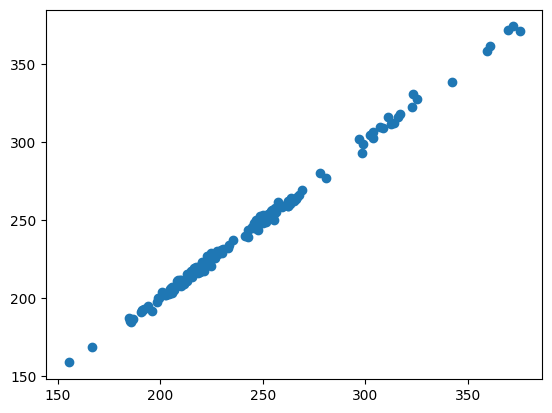

In [92]:
# scatter plot between y_test and y_predicted values
plt.scatter(y_test, y_predicted)
plt.show()

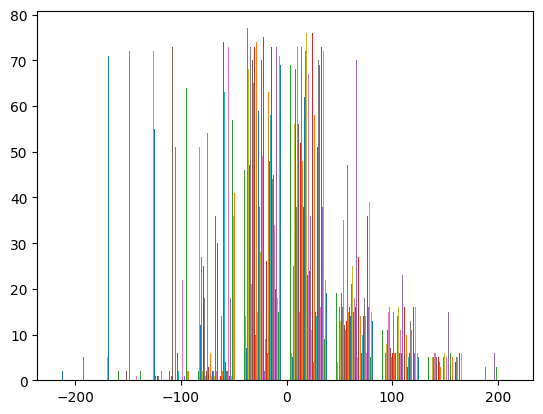

In [93]:
# histogram between y_test and y_predicted values
plt.hist(y_test - y_predicted)
plt.show()